# Exercise 1

We first load a dataset and examine its dimensions.

In [9]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

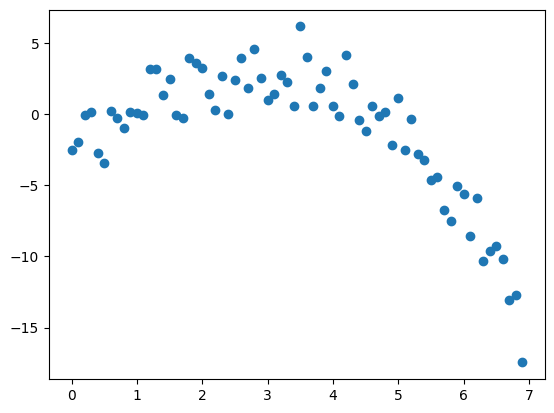

In [11]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

plt.scatter(xy_data[:,0], xy_data[:,1])

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [12]:
def polyreg(data_matrix, k):
    x = data_matrix[:, 0]
    y = data_matrix[:, 1]
    
    # Create the Vandermonde matrix
    X = np.vander(x, k+1, increasing=True)
    
    # Compute the least squares solution
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    
    # Compute the fit and residuals
    fit = np.dot(X, beta)
    residuals = y - fit
    
    return beta, fit, residuals
    
        

Use the tests below to check the outputs of the function you have written:

In [13]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

For k=2:
SSE: 172.1810252898855
R2: 0.8876297774918224

For k=3:
SSE: 152.40580488915805
R2: 0.9005356474205022

For k=4:
SSE: 151.22778969027118
R2: 0.9013044535638857

The best model is k=4.


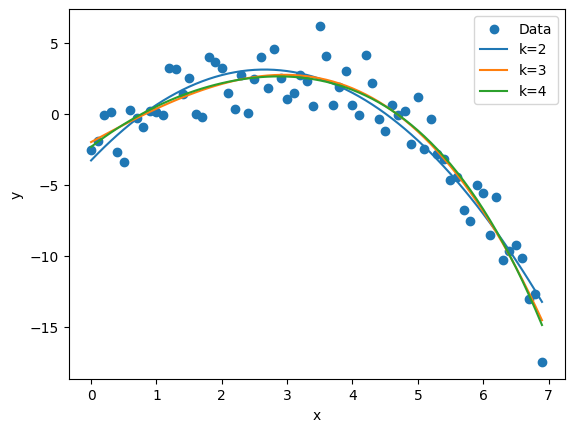

In [14]:
#Your code here
# Fit polynomial models for k=2,3,4
k_values = [2, 3, 4]
fits = []
residuals = []
sse_values = []
r2_values = []

# Plot scatterplot of the data
plt.scatter(xy_data[:, 0], xy_data[:, 1], label='Data')

# Fit polynomial models and plot the fits
for k in k_values:
    beta, fit, residual = polyreg(xy_data, k)
    fits.append(fit)
    residuals.append(residual)
    sse = np.sum(residual ** 2)
    sse_values.append(sse)
    r2 = 1 - (sse / np.sum((xy_data[:, 1] - np.mean(xy_data[:, 1])) ** 2))
    r2_values.append(r2)
    plt.plot(xy_data[:, 0], fit, label=f'k={k}')

# Add labels and legend to the plot
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Print SSE and R2 values for each model
for i, k in enumerate(k_values):
    print(f'For k={k}:')
    print(f'SSE: {sse_values[i]}')
    print(f'R2: {r2_values[i]}')
    print()

# Choose the best model based on R2 value
best_model_index = np.argmax(r2_values)
best_model_k = k_values[best_model_index]
print(f'The best model is k={best_model_k}.')




 #### State which model you choose and briefly justify your choice.
 
 
The model with k=4 since it minimised the residuals (evidenced by the highest R2)
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

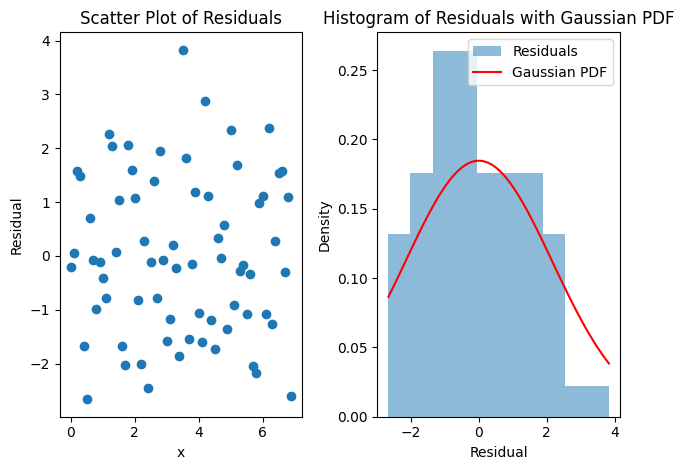

In [16]:
xcol = xy_data[:, 0]
residual = residuals[best_model_index]
residual_variance = np.var(residual)

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Scatter plot of residuals
plt.subplot(1, 2, 1)
plt.scatter(xcol, residual)
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Scatter Plot of Residuals')

# Histogram of residuals with Gaussian pdf
plt.subplot(1, 2, 2)
plt.hist(residual, bins=10, density=True, alpha=0.5, label='Residuals')
x = np.linspace(min(residual), max(residual), 100)
pdf = norm.pdf(x, loc=0, scale=residual_variance)
plt.plot(x, pdf, 'r-', label='Gaussian PDF')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Histogram of Residuals with Gaussian PDF')
plt.legend()

plt.tight_layout()
plt.show()
